
# Project: Investigate the European Soccer Competition dataset 


## Table of Contents
1. Introduction
2. Data Wrangling
>2.1. Gather data     
>2.2. Assess data  
>* Leages attributes
>* Player attributes
>* Team attributes
>* Match attributes
>2.3. Clean data

3. EDA (Exploratory Data Analysis)
4. Conclusions


<a id='intro'></a>
## 1. Introduction


As the second project assignment of the Data Analyst Nanodegree offered by Udacity I have choosen to investigate the European soccer competition dataset.

#### 1.1.  Dataset and its origin
In this project I have explored data to derive meaningfull insights based on the European Soccer Database set up by Hugo Matthien as an earlier Kaggle project through a thorough data collection and processing.

The created database is quite extensive and comprises data for 25k+ soccer matches for European Professional Football including players & teams attributes from several European countries from 2008 to 2016. 

More specific this dataset contains:
* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes sourced from EA Sports FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches





You can find a best description of how this dataset is created as an open source python project 
[Github of Hugo Matthien.](https://github.com/hugomathien/football-data-collection)

The following original Data Sources were used by Hugo Matthien: 
* http://football-data.mx-api.enetscores.com : scores, lineup, team formation and events
* http://www.football-data.co.uk/ : betting odds. Click [here](http://www.football-data.co.uk/) to understand the column naming system for betting odds.
* http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets are property of EA Sports.

 


#### 1.2. Research questions

This investigation of European soccer the analysis is directed towards the following 3 questions:
>* Which leagues have improved most in scoring goals between the seasons 2008/2009 and 2015/2016?
>* What player attributes contribute most to the main success metric ('Overall_rating') of a player?
>* What European team scored most goals in an away match and show its away_team_goal development over the seasons?



The following Python packages are used in this project:


In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sqlite3
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling



It this section we will respectively Gather, Assess and Clean the data.

### 2.1. Gather Data 


Substeps to the "Gather Data" milestone are Import, Store in a data store and Extract the data from the datastore.      

#### 2.1.1. Import data

The dataset is downloaded as the 'database.sqlite' file from
    [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite) at Kaggle.  This sqlite-file comes originally from Hugo Matthien which produced this European Soccer Database via 
    [this](https://www.kaggle.com/hugomathien/soccer) Kaggle project named "Data Analysis using SQL".
    
    

#### 2.1.2. Store dataset in a data store

After download of the 'soccer.zip' datafile I unzipped and stored this database.sqlite file in the 'European Soccer Project' projectfolder on my Macbook.

And then explored the tables of the dataset via the "DB Browser for SQlite software
" on my Macbook to understand the tables and its relationships on higher level.

#### 2.1.3. Extract the dataset 
    
First we will create the connection to the soccer database, and get the data in Pandas dataframes.

In [61]:
database = 'database.sqlite'
conn = sqlite3.connect(database)

In [62]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


This learns that there are 7 tables besides the "sqlite_sequence" table on the first row position.


 ### 2.2. Assess Data
    

To assess the data I have taken the following steps:
    
* First I explored the database tables and browsed through the data via the "DB Browser for SQLite" software on my Macbook.
* I explored the creation and attributes of the dataset by exploring the content of the European Soccer Project on [Kaggle](https://www.kaggle.com/hugomathien/soccer) plus also on [Github](https://github.com/hugomathien/football-data-collection) since that gave more detail.
* Thirdly I explored three Kernels who have used this soccer dataset which gave me a better understanding of the possibilities and limitations of the dataset.
I learned most from the 'Data Analysis using SQL' Kernel made by Dima Rudov as it is a good practice how to use the Python sqlite3-package to explore how the different (7) tables relate to each other.
* Finally I explored the tables via this Python notebook below..


### 2.2.1. Investigate the Leagues and Countries tables
First I wanted to know which Leagues and Countries are involved via this basic query.

In [63]:
leagues = pd.read_sql("""SELECT *
                        FROM League;""", conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [64]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


We have to join the Countries table and Leages table. An 'inner' JOIN is used to connect two tables to each other. 
*Note: 'inner' JOIN keeps only records that match the condition (after the ON) in both the tables. And records in both tables that do not match wouldn't appear in the output.*

In [65]:
leagues_incl_countryname = pd.read_sql("""SELECT 
                            country_id,
                            League.name AS competition_name,
                            Country.name AS country_name
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues_incl_countryname

,country_id,competition_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain




### 2.1.2. What Team attributes do we have?

In [66]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        ;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
...,...,...,...,...,...
294,43800,9868,1742.0,Xerez Club Deportivo,XER
295,31928,8021,110749.0,Zagłębie Lubin,ZAG
296,33855,8027,112512.0,Zawisza Bydgoszcz,ZAW
297,11822,4087,111271.0,Évian Thonon Gaillard FC,ETG


So we have 299 teams in the 11 leagues and we need to join the Team table with the Team_Attributes table to have all the team attributes in single table.

In [67]:
teams_incl_attributes = pd.read_sql("""SELECT
                            Team.id AS team_id,
                            Team_Attributes.id AS team_attribute_id, 
                            *
                        FROM Team
                        JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id;""", conn)
teams_incl_attributes

,team_id,team_attribute_id,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,1,49119,9930,434,FC Aarau,AAR,1,434,9930,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,2,49119,9930,434,FC Aarau,AAR,2,434,9930,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,3,49119,9930,434,FC Aarau,AAR,3,434,9930,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,4,39393,8485,77,Aberdeen,ABE,4,77,8485,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,5,39393,8485,77,Aberdeen,ABE,5,77,8485,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,3,1454,3,10000,15005,SV Zulte-Waregem,ZUL,1454,15005,10000,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,3,1455,3,10000,15005,SV Zulte-Waregem,ZUL,1455,15005,10000,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,3,1456,3,10000,15005,SV Zulte-Waregem,ZUL,1456,15005,10000,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,3,1457,3,10000,15005,SV Zulte-Waregem,ZUL,1457,15005,10000,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


Now we can drop the 2 columns 'id' which are copied to the columns 'team_id' and 'team_attribute_id' in the former step, so can be dropped:


In [68]:
teams_incl_attributes = teams_incl_attributes.drop(columns=['id'])

In [69]:
teams_incl_attributes.describe()

,team_id,team_attribute_id,team_api_id,team_fifa_api_id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,729.500000,9995.727023,17706.982167,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15015.159107,421.032659,13264.869900,39179.857739,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9547.250000,365.250000,8457.750000,110.000000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20524.500000,729.500000,8674.000000,485.000000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35294.000000,1093.750000,9904.000000,1900.000000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,50204.000000,1458.000000,274581.000000,112513.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


Let's check for NaN values. We notice that the buildUpPlayDribbling attribute of the team has less than one third of the values.

In [70]:
teams_incl_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 30 columns):
team_id                           1458 non-null int64
team_attribute_id                 1458 non-null int64
team_api_id                       1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing

In [71]:
sum(teams_incl_attributes.duplicated() )

0

In [72]:
type(teams_incl_attributes['date'][0] )

str

So we have to change the 'date' attribute to a datetime datatype:

In [73]:
pd.to_datetime(teams_incl_attributes['date'])

0      2010-02-22
1      2014-09-19
2      2015-09-10
3      2010-02-22
4      2011-02-22
          ...    
1453   2011-02-22
1454   2012-02-22
1455   2013-09-20
1456   2014-09-19
1457   2015-09-10
Name: date, Length: 1458, dtype: datetime64[ns]

### 2.1.3. What Player attributes do we have? 



Let now assess the player data:

In [74]:
player = pd.read_sql("""SELECT *
                        FROM Player
                        ;""", conn)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [75]:
sum(player.duplicated() )

0

So we have a total of 11.060 players over de seasons with no duplicates.

Let's now assess the player_attributes table:

In [76]:
player_attributes = pd.read_sql("""SELECT *
                        FROM Player_Attributes
                        ;""", conn)
player_attributes.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [77]:
sum(player_attributes.duplicated() )

0

So we have 11060 players. We can also enrich this Player table with the Player_attributes table.

In [78]:
players_incl_attributes = pd.read_sql("""SELECT 
                            Player.id AS player_id,
                            Player_attributes.id AS player_attributes_id,
                            *
                        FROM Player
                        JOIN Player_attributes ON Player.player_api_id = Player_attributes.player_api_id;""", conn)

In [79]:
players_incl_attributes = players_incl_attributes.drop(columns=['id'])


In [80]:
players_incl_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
player_id               183978 non-null int64
player_attributes_id    183978 non-null int64
player_api_id           183978 non-null int64
player_name             183978 non-null object
player_fifa_api_id      183978 non-null int64
birthday                183978 non-null object
height                  183978 non-null float64
weight                  183978 non-null int64
player_fifa_api_id      183978 non-null int64
player_api_id           183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float

In [81]:
players_incl_attributes['overall_rating'].isnull ().sum()

836

Since we don't have duplicates we join the Player table with the Player_attributes table:

Here we see the list of (836) rows with a missing 'overall_rating' value:

In [82]:
players_incl_attributes['overall_rating'].mean()

68.6000152886831

In [90]:
players_incl_attributes['overall_rating'].mean()

# players_incl_attributes.loc[:,'overall_rating'].fillna (players_incl_attributes.loc[:,'overall_rating'].mean(), inplace=True)
players_incl_attributes.head(50)


,player_id,player_attributes_id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,5,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,2,6,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,189615,155782,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,2,7,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,189615,155782,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,2,8,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,189615,155782,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,2,9,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,189615,155782,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,2,10,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,189615,155782,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [93]:
players_incl_attributes['overall_rating'].head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [91]:
# Now we see the count of NaN values per column:

players_incl_attributes.isnull().sum()    

player_id                  0
player_attributes_id       0
player_api_id              0
player_name                0
player_fifa_api_id         0
birthday                   0
height                     0
weight                     0
player_fifa_api_id         0
player_api_id              0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength      

BELOW I INSPECT THE DATATYPES AND CORRECT THEM:

In [31]:
players_incl_attributes.dtypes

player_id                 int64
player_attributes_id      int64
player_api_id             int64
player_name              object
player_fifa_api_id        int64
birthday                 object
height                  float64
weight                    int64
player_fifa_api_id        int64
player_api_id             int64
date                     object
overall_rating          float64
potential               float64
preferred_foot           object
attacking_work_rate      object
defensive_work_rate      object
crossing                float64
finishing               float64
heading_accuracy        float64
short_passing           float64
volleys                 float64
dribbling               float64
curve                   float64
free_kick_accuracy      float64
long_passing            float64
ball_control            float64
acceleration            float64
sprint_speed            float64
agility                 float64
reactions               float64
balance                 float64
shot_pow

In [32]:
type(players_incl_attributes['date'][0])

str

In [33]:
players_incl_attributes['date'] = pd.to_datetime(players_incl_attributes['date'])

In [34]:
players_incl_attributes['birthday'] = pd.to_datetime(players_incl_attributes['birthday'])

In [35]:
type(players_incl_attributes['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
type(players_incl_attributes['birthday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
players_incl_attributes.dtypes

player_id                        int64
player_attributes_id             int64
player_api_id                    int64
player_name                     object
player_fifa_api_id               int64
birthday                datetime64[ns]
height                         float64
weight                           int64
player_fifa_api_id               int64
player_api_id                    int64
date                    datetime64[ns]
overall_rating                 float64
potential                      float64
preferred_foot                  object
attacking_work_rate             object
defensive_work_rate             object
crossing                       float64
finishing                      float64
heading_accuracy               float64
short_passing                  float64
volleys                        float64
dribbling                      float64
curve                          float64
free_kick_accuracy             float64
long_passing                   float64
ball_control             

In [38]:
type(players_incl_attributes['preferred_foot'][0])

str

Let's explore the possible values of the defensive_work_rate. We see that there are quite a lot of dirty values (more than 5000 rows):

In [39]:
players_incl_attributes['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [40]:
players_incl_attributes.iloc[:,:16]  [players_incl_attributes['defensive_work_rate'] == 'tocky']

,player_id,player_attributes_id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate
16057,930,16058,38230,Apoula Edima Edel,177565,1986-06-17,182.88,176,177565,38230,2011-02-22,76.0,80.0,right,stoc,tocky
16058,930,16059,38230,Apoula Edima Edel,177565,1986-06-17,182.88,176,177565,38230,2010-08-30,70.0,74.0,right,stoc,tocky
16059,930,16060,38230,Apoula Edima Edel,177565,1986-06-17,182.88,176,177565,38230,2010-02-22,70.0,74.0,right,stoc,tocky
16060,930,16061,38230,Apoula Edima Edel,177565,1986-06-17,182.88,176,177565,38230,2009-08-30,64.0,71.0,right,stoc,tocky
16061,930,16062,38230,Apoula Edima Edel,177565,1986-06-17,182.88,176,177565,38230,2009-02-22,64.0,71.0,right,stoc,tocky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183667,11056,183668,27305,Zlatan Bajramovic,31667,1979-08-12,182.88,174,31667,27305,2009-08-30,75.0,82.0,right,stoc,tocky
183668,11056,183669,27305,Zlatan Bajramovic,31667,1979-08-12,182.88,174,31667,27305,2009-02-22,76.0,85.0,right,stoc,tocky
183669,11056,183670,27305,Zlatan Bajramovic,31667,1979-08-12,182.88,174,31667,27305,2008-08-30,77.0,85.0,right,stoc,tocky
183670,11056,183671,27305,Zlatan Bajramovic,31667,1979-08-12,182.88,174,31667,27305,2007-08-30,77.0,85.0,right,stoc,tocky


Describe stats do not show strange outliers at first sight..

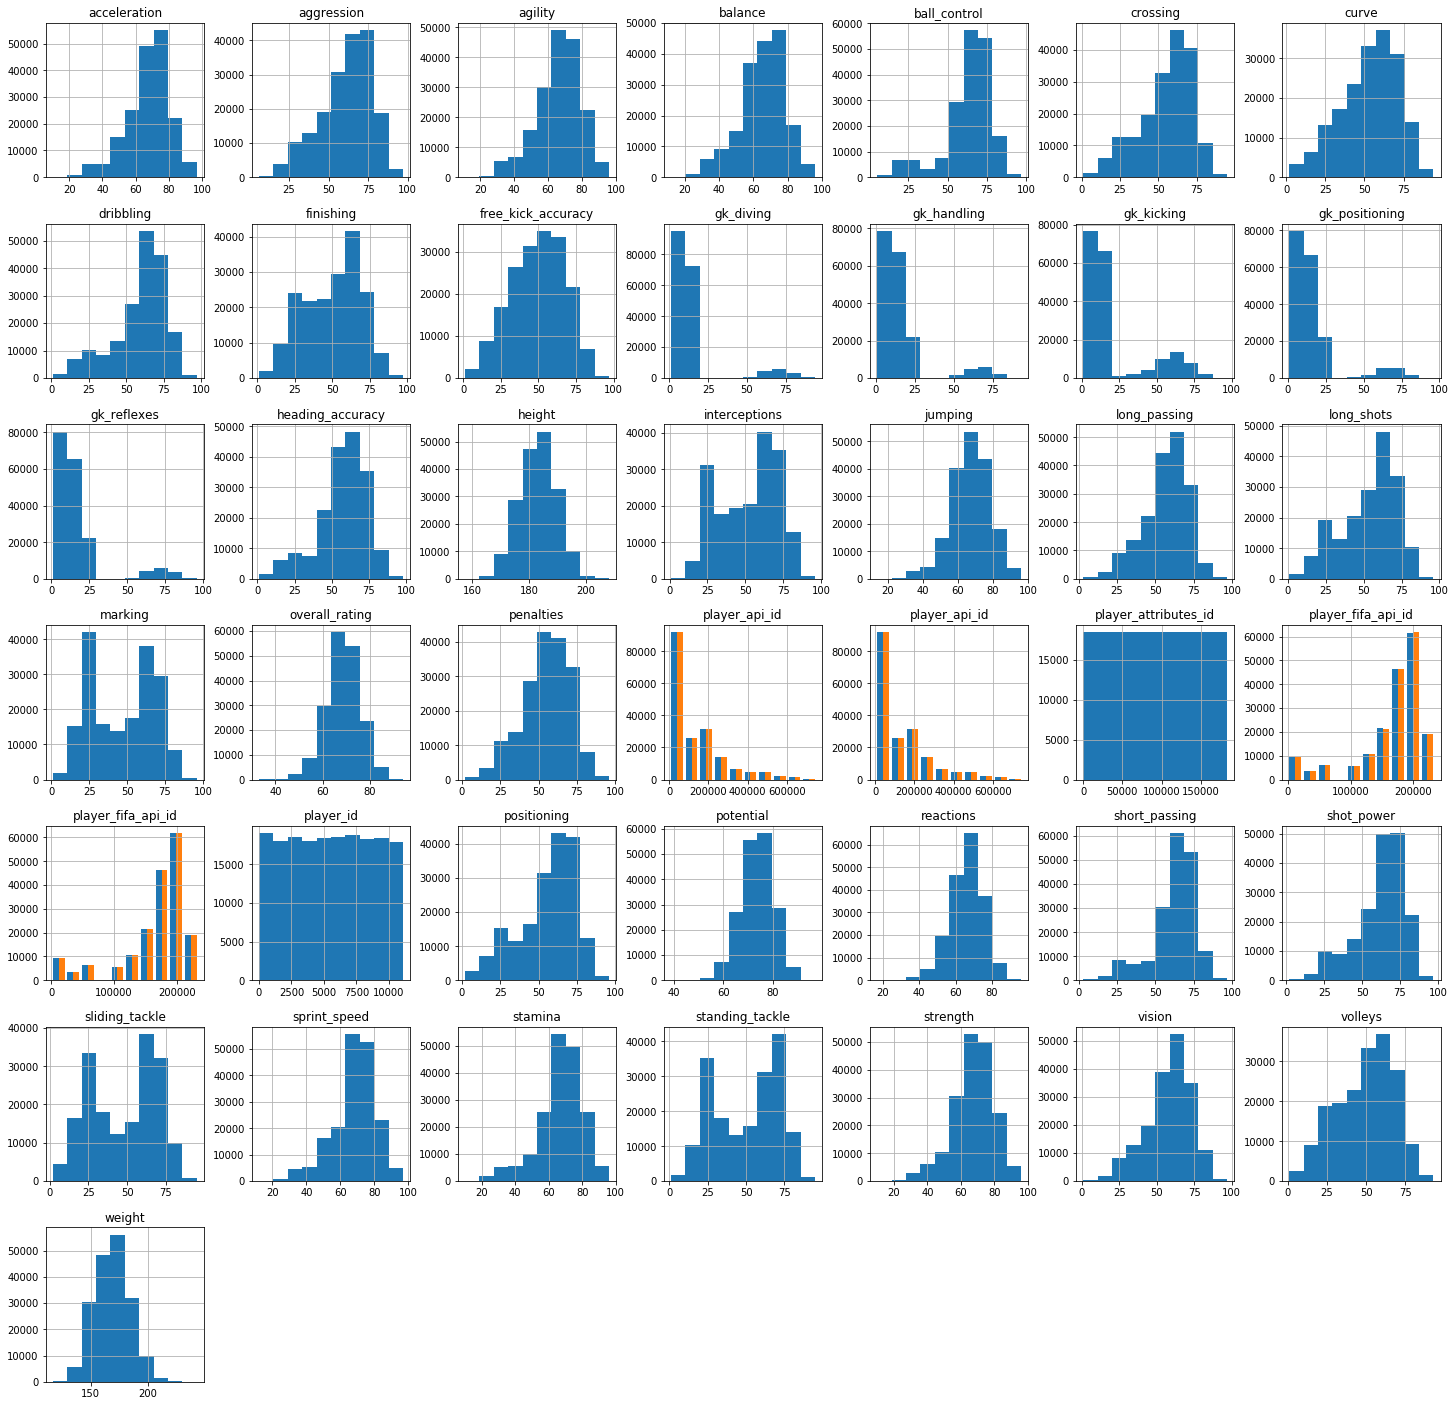

In [41]:
players_incl_attributes.hist (figsize = (25,25) );

### 2.1.4. What Match attributes do we have? 



We see that the European Soccer database is designed in a star structure: one table (Match) with all the "performance" and metrics and further only keys and IDs. And all the descriptive information is stored in other tables (Country, League, Team, Player).

This implies we need to join multiple tables to get all relevant information in one table.

Note that Team is joined twice. This is a tricky one, as while we are using the same table name, we basically bring two different copies (and rename them using AS). The reason is that we need to bring information about two different values (home_team_api_id, away_team_api_id), and if we join them to the same table, it would mean that they are equal to each other.

You will also note that the Team tables are joined using LEFT JOIN. The reason for it is that I prefer to keep the matches in the output - even if one of the teams doesn't appear in the Team table.



In [42]:
matches_all = pd.read_sql("""SELECT *                                      
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                             
                                ORDER by date
                                ;""", conn)        # LIMIT 10 voor de ;
matches_all

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,24559,24558,24558,2008/2009,1,2008-07-18 00:00:00,486263,10192,9931,1,...,49117,10192,900.0,BSC Young Boys,YB,49118,9931,896.0,FC Basel,BAS
1,24560,24558,24558,2008/2009,1,2008-07-19 00:00:00,486264,9930,10179,3,...,49119,9930,434.0,FC Aarau,AAR,49120,10179,110770.0,FC Sion,SIO
2,24561,24558,24558,2008/2009,1,2008-07-20 00:00:00,486265,10199,9824,1,...,49121,10199,897.0,FC Luzern,LUZ,49122,9824,286.0,FC Vaduz,VAD
3,24562,24558,24558,2008/2009,1,2008-07-20 00:00:00,486266,7955,10243,1,...,49123,7955,435.0,Neuchâtel Xamax,XAM,49124,10243,894.0,FC Zürich,ZUR
4,24613,24558,24558,2008/2009,2,2008-07-23 00:00:00,486267,9931,9956,1,...,49118,9931,896.0,FC Basel,BAS,49115,9956,322.0,Grasshopper Club Zürich,GRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25945,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992225,9931,9956,0,...,49118,9931,896.0,FC Basel,BAS,49115,9956,322.0,Grasshopper Club Zürich,GRA
25975,25946,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992226,7896,10190,3,...,51606,7896,NaN,Lugano,LUG,49479,10190,898.0,FC St. Gallen,GAL
25976,25947,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992227,10199,10179,2,...,49121,10199,897.0,FC Luzern,LUZ,49120,10179,110770.0,FC Sion,SIO
25977,25948,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992228,10191,10192,0,...,49837,10191,1715.0,FC Thun,THU,49117,10192,900.0,BSC Young Boys,YB


In [43]:
matches_all.iloc[:40,:50].dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      float64
away_player_X10     float64
away_player_X11     float64
home_player_Y1      float64
home_player_Y2      float64
home_player_Y3      

In [44]:
matches_all.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,BSA,id,id,country_id,id,team_api_id,team_fifa_api_id,id,team_api_id,team_fifa_api_id
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,14161.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25801.000000,25979.000000,25979.000000,25801.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.405663,11738.630317,11738.630317,11738.630317,23871.933600,9984.371993,15849.694004,23871.830517,9984.475115,15848.954847
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.189814,7553.936759,7553.936759,7553.936759,15103.110813,14087.453758,37336.801976,15102.994440,14087.445135,37335.020045
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.120000,1.000000,1.000000,1.000000,1.000000,1601.000000,1.000000,1.000000,1601.000000,1.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,4769.000000,4769.000000,4769.000000,9551.000000,8475.000000,80.000000,9551.000000,8475.000000,80.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.400000,10257.000000,10257.000000,10257.000000,22042.000000,8697.000000,467.000000,22042.000000,8697.000000,467.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.000000,17642.000000,17642.000000,17642.000000,37210.000000,9925.000000,1892.000000,37210.000000,9925.000000,1892.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,34.000000,24558.000000,24558.000000,24558.000000,51606.000000,274581.000000,112513.000000,51606.000000,274581.000000,112513.000000


In [45]:
matches_all.dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
                     ...   
id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
Length: 130, dtype: object

In [46]:
matches_all.shape

(25979, 130)

So the number of match features/columns is very high (130!). Let us now generate a table with just an overview of matches per country, per season:

In [47]:
overview_matches = pd.read_sql("""SELECT Match.id AS match_id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                ;""", conn)        # LIMIT 10 voor de ;
overview_matches

,match_id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
...,...,...,...,...,...,...,...,...,...,...
3035,24490,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Sporting de Gijón,Villarreal CF,2,0
3036,24491,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Betis Balompié,Getafe CF,2,1
3037,24492,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,RCD Espanyol,SD Eibar,4,2
3038,24495,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Málaga CF,UD Las Palmas,4,1


In [48]:
overview_matches['date'] = pd.to_datetime(overview_matches['date'])

Overview statistics show that 25% of seasons have less that 10 stages. And that the home_team has scored a maximum of 10 goals versus 8 of the away_team:

In [49]:
overview_matches.describe()

,match_id,stage,home_team_goal,away_team_goal
count,3040.000000,3040.00000,3040.000000,3040.000000
mean,23037.500000,19.50000,1.631250,1.135855
std,877.716735,10.96766,1.388339,1.161079
min,21518.000000,1.00000,0.000000,0.000000
25%,22277.750000,10.00000,1.000000,0.000000
50%,23037.500000,19.50000,1.000000,1.000000
75%,23797.250000,29.00000,2.000000,2.000000
max,24557.000000,38.00000,10.000000,8.000000


### 2.3. Data Cleaning (Replace this with more specific notes!)


After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


XXXXX

<a id='eda'></a>
## 3. Exploratory Data Analysis (EDA)

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



> Use this, and more code cells, to explore your data. Don't forget to add Markdown cells to document your observations and findings.


Steps to 'Exploratory Data Analysis (EDA)' milestone:

>6. ?Transform – Change data into something your program will understand 
>7. Visualize – Descriptive statistics exploration
>8. Model – Statistics + Machine Learning + Experiment Design 
>9. Coding – Machine Learning + Algorithms + Code 


### Research Question 1: Which leagues have improved most in scoring goals  between the seasons 2008/2009 and 2015/2016?

The question is translated to a more specific question, based on exploration of available data in section 3: *Which leagues have the largest increase in average number of goals per match (avg_goals) between season 2008/2009 and season 2015/2016?*

We will limit us to most important leages in European soccer ('Spain', 'Germany', 'France', 'Italy', 'England').



##### HOW TO APPROACH THIS RESEARCH QUESTION?

In the next steps we create a separate table for respectively the 2008-2009 season and 2015-2016 season, which we will later concatenate to be able to compare the avg_goals between these 2 seasons.

First we create a separate table for the 2008/2009 season.

Here we are starting to look at the data at more aggregated level. 
Instead of looking on the raw data we will start to group it to different levels we want to examine.
In this example, we will use a query and first remove the match and date information, plus look at it at the country-league-season level.

The functionality we will use for that is GROUP BY, that comes between the WHERE and ORDER.

Once you choose what level you want to analyse, we can divide the select statement to two:
 * Dimensions - those are the values we describing, same that we group by later.
 * Metrics - all the metrics have to be aggregated using functions.. 
The common functions are: sum(), count(), count(distinct), avg(), min(), max()

Note - it is very important to use the same dimensions both in the SELECT, and in the GROUP BY. Otherwise the output might be wrong.

Another functionality that can be used after grouping, is HAVING. This adds another layer of filtering the data, this time the output of the table **after** the grouping. A lot of times it is used to clean the output.


In [50]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [51]:
leagues_by_season_2008_2009 = leages_by_season [leages_by_season ['season'] == '2008/2009' ]  
leagues_by_season_2008_2009

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
15,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
23,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
31,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
39,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101


In [52]:
# Hereby we reset the index to be able to cancat this table in later step

leagues_by_season_2008_2009.reset_index(drop=True, inplace=True)
leagues_by_season_2008_2009.rename(columns=lambda x: x[:] + "_2008", inplace=True)     #df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)
leagues_by_season_2008_2009

/Users/dirkkadijk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,country_name_2008,league_name_2008,season_2008,number_of_stages_2008,number_of_teams_2008,avg_home_team_scors_2008,avg_away_team_goals_2008,avg_goal_dif_2008,avg_goals_2008,total_goals_2008
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
2,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
3,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
4,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101


Now we create a similar separate table for the 2015/2016 season:

In [53]:
leagues_by_season_2015_2016 = leages_by_season [leages_by_season ['season'] == '2015/2016' ] 
leagues_by_season_2015_2016.rename(columns=lambda x: x[:15] + "_2015", inplace=True)   #df_08.rename(columns=lambda x: x[:12] + "_2015", inplace=True)
leagues_by_season_2015_2016

,country_name_2015,league_name_2015,season_2015,number_of_stage_2015,number_of_teams_2015,avg_home_team_s_2015,avg_away_team_g_2015,avg_goal_dif_2015,avg_goals_2015,total_goals_2015
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
16,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
24,Italy,Italy Serie A,2015/2016,38,20,1.471053,1.105263,0.365789,2.576316,979
32,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043


In [54]:
leagues_by_season_2015_2016.reset_index(drop=True, inplace=True)
leagues_by_season_2015_2016

,country_name_2015,league_name_2015,season_2015,number_of_stage_2015,number_of_teams_2015,avg_home_team_s_2015,avg_away_team_g_2015,avg_goal_dif_2015,avg_goals_2015,total_goals_2015
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
2,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
3,Italy,Italy Serie A,2015/2016,38,20,1.471053,1.105263,0.365789,2.576316,979
4,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043


And now we can concatenate the 2 tables of each season with the purpose to create a new column with the increase_avg_goals between 2008 and 2015:

In [55]:
scoring_compared_2008_2016_vs_2015_2016 = pd.concat([leagues_by_season_2008_2009, leagues_by_season_2015_2016], axis='columns') 
scoring_compared_2008_2016_vs_2015_2016

# NOTE alternative for concatenation is the merge function:
# scoring_compared_merge = pd.merge(leagues_by_season_2008_2009, leagues_by_season_2015_2016, left_on='league_name_2008', right_on='league_name_2015', how='outer')


,country_name_2008,league_name_2008,season_2008,number_of_stages_2008,number_of_teams_2008,avg_home_team_scors_2008,avg_away_team_goals_2008,avg_goal_dif_2008,avg_goals_2008,total_goals_2008,country_name_2015,league_name_2015,season_2015,number_of_stage_2015,number_of_teams_2015,avg_home_team_s_2015,avg_away_team_g_2015,avg_goal_dif_2015,avg_goals_2015,total_goals_2015
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
2,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
3,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988,Italy,Italy Serie A,2015/2016,38,20,1.471053,1.105263,0.365789,2.576316,979
4,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043


In [56]:
# Now we limit the table to the relevant columns

scoring_compared_2008_2016_vs_2015_2016 = scoring_compared_2008_2016_vs_2015_2016.iloc[:, np.r_[:2, 8:10, 18:20]]       
scoring_compared_2008_2016_vs_2015_2016

# NOTE template is:                 df_SE = df.iloc[:, np.r_ [:2, 12:22]]    
# NOTE alternative template is:     df.drop('['columnA'],['columnX']), axis=1, inplace=True')


,country_name_2008,league_name_2008,avg_goals_2008,total_goals_2008,avg_goals_2015,total_goals_2015
0,England,England Premier League,2.478947,942,2.700000,1026
1,France,France Ligue 1,2.257895,858,2.526316,960
2,Germany,Germany 1. Bundesliga,2.921569,894,2.830065,866
3,Italy,Italy Serie A,2.600000,988,2.576316,979
4,Spain,Spain LIGA BBVA,2.897368,1101,2.744737,1043


Here we create the new column with the increase in avg_goals between the first and last season.

In [30]:
scoring_compared_2008_2016_vs_2015_2016.loc[:,'increase_avg_goals_2015vs2008'] = scoring_compared_2008_2016_vs_2015_2016['avg_goals_2015'] - scoring_compared_2008_2016_vs_2015_2016['avg_goals_2008'] 
scoring_compared_2008_2016_vs_2015_2016

# NOTE template is:           model_mpg['mpg_change'] = model_mpg['cmb_mpg_2018'] - model_mpg['cmb_mpg_2008']

NameError: name 'scoring_compared_2008_2016_vs_2015_2016' is not defined

In [59]:
# Here we sort the increase in avg_goals in ascending order:

scoring_compared_2008_2009_vs_2015_2016 = scoring_compared_2008_2016_vs_2015_2016.sort_values(by='increase_avg_goals_2015vs2008', ascending=False)      
scoring_compared_2008_2009_vs_2015_2016

# NOTE template is:             df.sort_values(by='B')

,country_name_2008,league_name_2008,avg_goals_2008,total_goals_2008,avg_goals_2015,total_goals_2015,increase_avg_goals_2015vs2008
1,France,France Ligue 1,2.257895,858,2.526316,960,0.268421
0,England,England Premier League,2.478947,942,2.700000,1026,0.221053
3,Italy,Italy Serie A,2.600000,988,2.576316,979,-0.023684
2,Germany,Germany 1. Bundesliga,2.921569,894,2.830065,866,-0.091503
4,Spain,Spain LIGA BBVA,2.897368,1101,2.744737,1043,-0.152632


 Now we want to find the League_name with the maximum increase in avg_goals between 2008 and 2015.

In [60]:
# Find the max increase in avg_goals ..: 

max_increase_avg_goals_2015vs2008 = scoring_compared_2008_2009_vs_2015_2016 ['increase_avg_goals_2015vs2008'].max()     
max_increase_avg_goals_2015vs2008

# NOTE template is:       max_change = model_mpg['mpg_change'].max()

0.26842105263157867

In [61]:
# .. and then use indexing to see what league_name wins!     

scoring_compared_2008_2016_vs_2015_2016 [scoring_compared_2008_2016_vs_2015_2016['increase_avg_goals_2015vs2008'] == max_increase_avg_goals_2015vs2008 ]              


# NOTE template is:         model_mpg[model_mpg['mpg_change'] == max_change]

,country_name_2008,league_name_2008,avg_goals_2008,total_goals_2008,avg_goals_2015,total_goals_2015,increase_avg_goals_2015vs2008
1,France,France Ligue 1,2.257895,858,2.526316,960,0.268421


Now we visualize how the winning French result compares to the avg_goal deltas of the other leagues.

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns    

In [63]:
# help ()


# is the command for help regarding bar

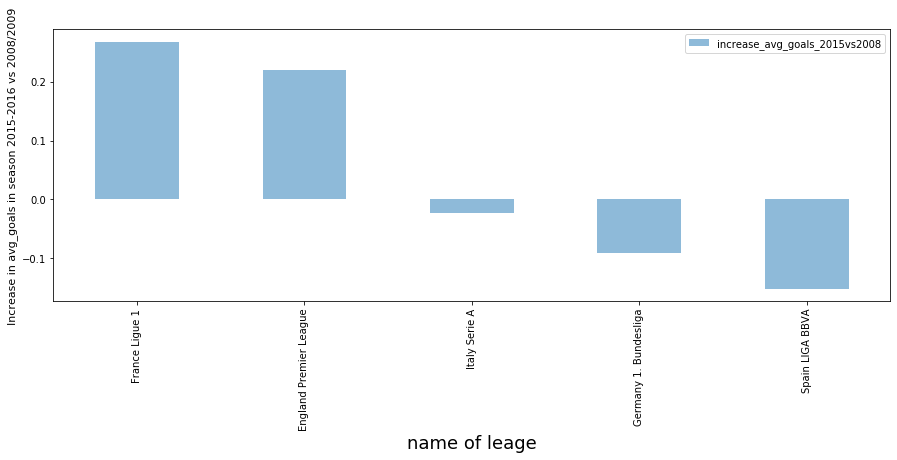

In [95]:
# Here you can see also visually that the French league has won:

scoring_compared_2008_2009_vs_2015_2016.plot.bar (x = 'league_name_2008', y = 'increase_avg_goals_2015vs2008',alpha=0.5, figsize=(15,5), label = 'increase_avg_goals_2015vs2008')
plt.legend()
plt.ylabel('Increase in avg_goals in season 2015-2016 vs 2008/2009', fontsize=11)
plt.xlabel('name of leage', fontsize=18);

Plot aboves shows that besides the French Ligue 1 only the England Premier League scored also more goals per game, while the other 3 leagues had each a decrease in avg_goals.
The Spain LIGA BBVA scored the worst with a 0.15 goals/game decrease between the seasons 2008 and 2015.

In [65]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [66]:
# NOTE: An alternative method_A to filter out the relevant countries and seasons is via a mask created with the 'isin' and the inner join ('&') functions:

best_leagues = ['Spain', 'Germany', 'France', 'Italy', 'England']
two_seasons = ['2008/2009', '2015/2016']
overview_table = leages_by_season[leages_by_season.country_name.isin(best_leagues)   & leages_by_season.season.isin(two_seasons)]
overview_table

#  negate boolean variable via '~':  
# eng_germ = leages_by_season[~leages_by_season.country_name.isin(best_leagues)   & leages_by_season.season.isin(two_seasons)]


,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
15,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
16,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
23,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
24,Italy,Italy Serie A,2015/2016,38,20,1.471053,1.105263,0.365789,2.576316,979
31,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
32,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043
39,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101


In [67]:
# Another alternative method_B is to use the query function:

leages_by_season.query('country_name in ["Spain", "Germany", "France", "Italy", "England"] & season in ["2008/2009", "2015/2016"] ')

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
15,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
16,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
23,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
24,Italy,Italy Serie A,2015/2016,38,20,1.471053,1.105263,0.365789,2.576316,979
31,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
32,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043
39,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101


### Research Question 2: What player attributes contribute most to the success ('Overall_rating') of a player?

So with this question we will look into what player attributes contribute to the success of European soccer players.  

The metric of success we use is the (dependent) variable soccer player's 'Overall rating' score. 

We will restrict this analysis to some key main personal properties of a player (weight, height, age) and the so-called 'potential' score. This Potential score is determined via judging the players  based on performance in matches by a panel of professional jury members.
    

##### HOW TO APPROACH THIS RESEARCH QUESTION?

1. First we need to import and join the 'Player' table (with the player's basic details as name, height, weight, birthday) with the 'Player_attributes' table that holds much more attributes.

The problem is that while the first table holds one row for each player, the key in the second table is player+season, so if we do a regular join, the result would be a Cartesian product, and each player's basic details would appear as many times as this player appears in the Player_attributes table. The problem with this is that the average would be skewed towards players that appear many times in the attribute table.

The solution, is to use a subquery.  We would need to group the attributes table, to a different key on an aggregated level: player level only (without season) based on average (weight, height, etc).
Once both tables have the same keys, we can join them together.

2. Secondly we compute statistics and create visualisations with the goals of addressing the research question posed above.


 
                                                   
    
    


In [68]:
# So first we create the joined table with relevant variables.

players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight,
                                        AVG(birthday) AS avg_birthday
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight,avg_birthday
0,165.0,74,67.365543,73.327754,139.459459,1987.364865
1,168.0,118,67.500518,73.124182,144.127119,1986.754237
2,170.0,403,67.726903,73.379056,147.799007,1987.563275
3,173.0,530,66.980272,72.848746,152.824528,1987.333962
4,175.0,1188,66.805204,72.258774,156.111953,1986.844276
5,178.0,1489,66.367212,71.943339,160.665547,1987.128274
6,180.0,1388,66.419053,71.846394,165.261527,1986.822046
7,183.0,1954,66.634380,71.754555,170.167861,1986.385363
8,185.0,1278,66.928964,71.833475,174.636933,1986.032864
9,188.0,1305,67.094253,72.151949,179.278161,1986.517241


Let us first create some basis statistics. We see her ethat 74 players are <165 cm and 1954 are larger than 195 cm:



In [69]:
players_height.describe()

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight,avg_birthday
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,180.307692,850.769231,67.056209,72.414537,166.183362,1986.724108
std,9.826704,609.177062,0.429325,0.593929,17.988779,0.518794
min,165.000000,74.000000,66.367212,71.754555,139.459459,1986.013804
25%,173.000000,403.000000,66.805204,71.846394,152.824528,1986.385363
50%,180.000000,652.000000,66.997649,72.258774,165.261527,1986.754237
75%,188.000000,1305.000000,67.425619,72.848746,179.278161,1987.128274
max,195.000000,1954.000000,67.726903,73.379056,196.464455,1987.563275


Let us calculate the correlation between the features 'calc_height', 'avg_weight', 'avg_potential' and the dependent variable 'avg_overall_rating':

In [70]:
players_height [[ 'calc_height', 'avg_weight', 'avg_potential', 'avg_overall_rating']].corr()

,calc_height,avg_weight,avg_potential,avg_overall_rating
calc_height,1.000000,0.997587,-0.611426,-0.091619
avg_weight,0.997587,1.000000,-0.572204,-0.053172
avg_potential,-0.611426,-0.572204,1.000000,0.786458
avg_overall_rating,-0.091619,-0.053172,0.786458,1.000000


As one could expect is the 'potential' variable the best predictor of the 'avg_overall_rating'. 
While the variables height and weight have almost no correlation (correlation score resp. -0.09 and -0.05).

What is surprising is that height and weigh do have a significant negative correlation (both -0.6) to the variable 'avg_potential'... Let us now first further analyse the relationship between height and resp. Overall_rating and Potential visually via plots. 



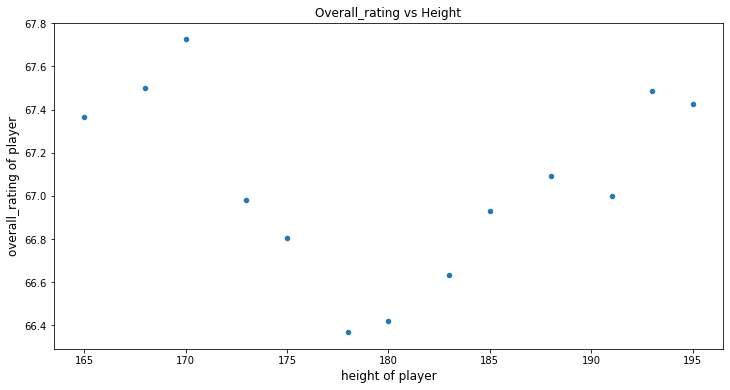

In [155]:
players_height.plot(x=['calc_height'],y=['avg_overall_rating'],figsize=(12,6), title='Overall_rating vs Height', marker='o', kind='scatter');

plt.ylabel('overall_rating of player', fontsize=12)
plt.xlabel('height of player', fontsize=12);


In [147]:
players_height.plot(x=['calc_height'],y=['avg_potential'],figsize=(12,5),title='Potential vs Height', kind='scatter', color='red');

plt.ylabel('avg_potential of player', fontsize=12)
plt.xlabel('height of player', fontsize=12);


SyntaxError: positional argument follows keyword argument (<ipython-input-147-e821e6531cd3>, line 1)

If we compare the 2 plots we see **relative high** avg_potential score for players with a height less thant 175 cm + relative low scores for players with height > 190 cm in the second 'Potential vs Height' plot. 

Why is there an overrepresentation a small (<175 cm) players for the Potential variable? Let us therefore analyse the relationship between height and age since we could assume the hypotheses that 'players with high potential are relative young'.



In the following correlation matrix we notice a negative (-0.81) correlation between calc_height and avg_birthday, so that confirms the hypotheses that players with high potential are relative young.

In [73]:
players_height [[ 'calc_height', 'avg_weight', 'avg_potential', 'avg_birthday', 'avg_overall_rating']].corr()

,calc_height,avg_weight,avg_potential,avg_birthday,avg_overall_rating
calc_height,1.000000,0.997587,-0.611426,-0.810089,-0.091619
avg_weight,0.997587,1.000000,-0.572204,-0.810282,-0.053172
avg_potential,-0.611426,-0.572204,1.000000,0.640124,0.786458
avg_birthday,-0.810089,-0.810282,0.640124,1.000000,0.118804
avg_overall_rating,-0.091619,-0.053172,0.786458,0.118804,1.000000


Also the following plot confirms this negatieve correlation  between age and height, which makes sense from logical point of view.

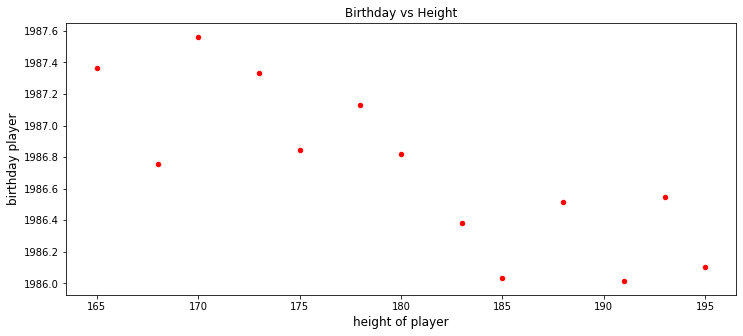

In [145]:
players_height.plot(x=['calc_height'],y=['avg_birthday'],figsize=(12,5),title='Birthday vs Height', kind='scatter', color='red')

plt.ylabel('birthday player', fontsize=12)
plt.xlabel('height of player', fontsize=12);

### Research Question 3: What European team scored most goals in an away match and show its away_team_goal development over the seasons?

##### HOW TO APPROACH THIS RESEARCH QUESTION?

1. First we create a joint table with the teams and the matches.

2. Then we determine the game with the most away goals with the score and team which scored the most away_goals.

3. In the third step we visualise the away_team_goal average development over the seasons of the best scoring team determined in step 2.



So first we create a table with all the matches with the scores and retrict ourselves to the main leagues.


In [75]:
leages_by_team = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        HT.team_long_name AS HT_team_long_name,
                                        AT.team_long_name AS AT_team_long_name,
                                        home_team_goal AS HT_home_team_goal,
                                        away_team_goal AS AT_away_team_goal

                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                ORDER by country.name, season
                                ;""", conn)
leages_by_team.head(40)


,country_name,league_name,season,HT_team_long_name,AT_team_long_name,HT_home_team_goal,AT_away_team_goal
0,England,England Premier League,2008/2009,Manchester United,Newcastle United,1,1
1,England,England Premier League,2008/2009,Arsenal,West Bromwich Albion,1,0
2,England,England Premier League,2008/2009,Sunderland,Liverpool,0,1
3,England,England Premier League,2008/2009,West Ham United,Wigan Athletic,2,1
4,England,England Premier League,2008/2009,Aston Villa,Manchester City,4,2
5,England,England Premier League,2008/2009,Everton,Blackburn Rovers,2,3
6,England,England Premier League,2008/2009,Middlesbrough,Tottenham Hotspur,2,1
7,England,England Premier League,2008/2009,Bolton Wanderers,Stoke City,3,1
8,England,England Premier League,2008/2009,Hull City,Fulham,2,1
9,England,England Premier League,2008/2009,Chelsea,Portsmouth,4,0


Let us now determine some basic statistics about the scoring.

In [79]:
print('The avg_home_team score is', leages_by_team['HT_home_team_goal'].mean(), ', while the avg_away_team score is quite lower with', leages_by_team['AT_away_team_goal'].mean(), '.' )

The avg_home_team score is 1.5391840932464862 , while the avg_away_team score is quite lower with 1.1400754199520056 .


In [80]:
leages_by_team['HT_home_team_goal'].describe()

count    14585.000000
mean         1.539184
std          1.289485
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: HT_home_team_goal, dtype: float64

So the maximum of goals scored by home team is 10.
This was in a game between Real Madrid and Rayo Vellecano in the 2015/2016 season:

In [81]:
HT_max_score = leages_by_team['HT_home_team_goal'].max()
leages_by_team [leages_by_team['HT_home_team_goal'] == HT_max_score]

,country_name,league_name,season,HT_team_long_name,AT_team_long_name,HT_home_team_goal,AT_away_team_goal
14275,Spain,Spain LIGA BBVA,2015/2016,Real Madrid CF,Rayo Vallecano,10,2


Let's now determine in what game(s) the most away_team_goals were scored?. Well that is Paris Saint-Germain in a game against ES Troyes AC with an excellent score 0-9:


In [180]:
AT_max_score = leages_by_team['AT_away_team_goal'].max()
leages_by_team [leages_by_team['AT_away_team_goal'] == AT_max_score]

,country_name,league_name,season,HT_team_long_name,AT_team_long_name,HT_home_team_goal,AT_away_team_goal
5932,France,France Ligue 1,2015/2016,ES Troyes AC,Paris Saint-Germain,0,9


Let us now visualise the away_team_goal average development over the seasons of the this best scoring team in away matches Paris Saint-Germain.

First we group the away_team_goal per league and team, and create a table with the away_team_score per team over the seasons:

In [117]:
away_team_goals_perteam = leages_by_team.groupby(['league_name','AT_team_long_name', 'season']).AT_away_team_goal.mean().unstack()
away_team_goals_perteam.head(60)

season                                          2008/2009  2009/2010  \
league_name            AT_team_long_name                               
England Premier League Arsenal                   1.947368   1.842105   
                       Aston Villa               1.421053   1.210526   
                       Birmingham City                NaN   1.000000   
                       Blackburn Rovers          0.947368   0.684211   
                       Blackpool                      NaN        NaN   
                       Bolton Wanderers          1.052632   0.842105   
                       Bournemouth                    NaN        NaN   
                       Burnley                        NaN   0.894737   
                       Cardiff City                   NaN        NaN   
                       Chelsea                   1.842105   1.842105   
                       Crystal Palace                 NaN        NaN   
                       Everton                   1.263158   1.315789   
                       Fulham                    0.578947   0.631579   
                       Hull City                 1.105263   0.631579   
                       Leicester City                 NaN        NaN   
                       Liverpool                 1.894737   0.947368   
                       Manchester City           0.947368   1.684211   
                       Manchester United         1.315789   1.789474   
                       Middlesbrough             0.578947        NaN   
                       Newcastle United          0.842105        NaN   
                       Norwich City                   NaN        NaN   
                       Portsmouth                0.631579   0.526316   
                       Queens Park Rangers            NaN        NaN   
                       Reading                        NaN        NaN   
                       Southampton                    NaN        NaN   
                       Stoke City                0.842105   0.526316   
                       Sunderland                0.684211   0.842105   
                       Swansea City                   NaN        NaN   
                       Tottenham Hotspur         1.263158   1.421053   
                       Watford                        NaN        NaN   
                       West Bromwich Albion      0.526316        NaN   
                       West Ham United           1.000000   0.894737   
                       Wigan Athletic            0.894737   0.947368   
                       Wolverhampton Wanderers        NaN   1.000000   
France Ligue 1         AC Ajaccio                     NaN        NaN   
                       AC Arles-Avignon               NaN        NaN   
                       AJ Auxerre                0.894737   0.947368   
                       AS Monaco                 0.789474   0.684211   
                       AS Nancy-Lorraine         1.000000   1.368421   
                       AS Saint-Étienne          0.789474   0.736842   
                       Angers SCO                     NaN        NaN   
                       Dijon FCO                      NaN        NaN   
                       ES Troyes AC                   NaN        NaN   
                       En Avant de Guingamp           NaN        NaN   
                       FC Lorient                1.368421   0.947368   
                       FC Metz                        NaN        NaN   
                       FC Nantes                 0.631579        NaN   
                       FC Sochaux-Montbéliard    0.842105   0.526316   
                       GFC Ajaccio                    NaN        NaN   
                       Girondins de Bordeaux     1.473684   1.263158   
                       Grenoble Foot 38          0.789474   0.368421   
                       LOSC Lille                0.894737   1.473684   
                       Le Havre AC               0.684211        NaN   
                       Le Mans FC       

In the second-to-last row in table above you see the avg_score as away-team of Paris Saint-Germain (PSG(). PSG had a relative high-score in the last 2015/2016 season largely caused by their major 0-9 win against ES Troyes AC as identified in the analysis step before.

Let's now plot this avg_score development for Paris Saint-Germain and compare it with score of another major team Liverpool. 

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns    

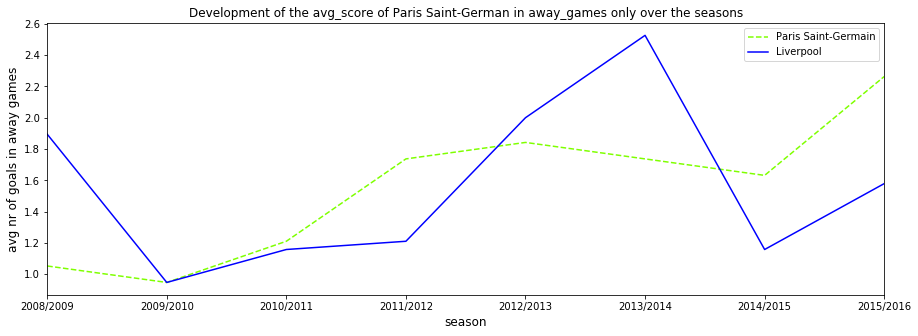

In [136]:
away_team_goals_perteam.loc['France Ligue 1', 'Paris Saint-Germain'].plot(kind='line', figsize=(15,5), label='Paris Saint-Germain', style=['--'], color='chartreuse')
away_team_goals_perteam.loc['England Premier League', 'Liverpool'].plot(kind='line', figsize=(15,5), label='Liverpool', color='blue')

plt.title('Development of the avg_score of Paris Saint-German in away_games only over the seasons')


plt.ylabel('avg nr of goals in away games', fontsize=12)
plt.xlabel('season', fontsize=12)
plt.legend();


We can see that the trend in away_match_goals of PSG is positively upwards over the period.

But it also shows that Liverpool had an even higher score in the season 2013/2014.


<a id='conclusions'></a>
## 4. Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. 

> Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!



NOTE: You will not be required to use inferential statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. 

Steps to 'Conclusions' milestone:

>10. ? Understand - Understand insights achieved
>11. Communicate - What was the approach, what worked, what didn’t work, what assumptions were made, what would you do different, why do insights matter ?
>12. Next Steps - Where I go from here      #Communicate your results
>13. ? Document - Code + Thought process + Replication steps


## 5. Communicate your results
> Tip: Finally, summarize your findings and the results that have been performed. 

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!